# Data exploration

## Imports

In [12]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
from extract import extract, SPOTIFY_DATASET, DOWNLOAD_PATH

## Downloading the data

In [4]:
data = extract(SPOTIFY_DATASET, DOWNLOAD_PATH, True)

100%|███████████████████████████████████████████████████████████| 8.17M/8.17M [00:00<00:00, 9.17MB/s]

Extracting files...


The dataset consists of different tracks, with a `track_id` unique identifier. Standard metadata like `artists` (with multiple artists seperated with a `;`) and `track_name`, `album_name` are also included. The popularity score is scaled from `0-100`. Other properties like `energy`, `key`, `loudness`, `instrumentalness` are also included.

In [5]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


There are $114,000$ rows in the dataset, with some null values. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [10]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### Column descriptions

#### Popularity

The spotify [popularity index](https://www.artist.tools/features/spotify-popularity-index) is a score from $0-100$, with $100$ representing the most popular tracks. It ranks songs based on their **current** level of listener engagement: newer streams are weighted more heavily than older streams.

- **NB**: Since this dataset was last updated 2 years ago, predictions will be made based on historical data, rather than the most recent data. This should be updated later (more recent data extracted).


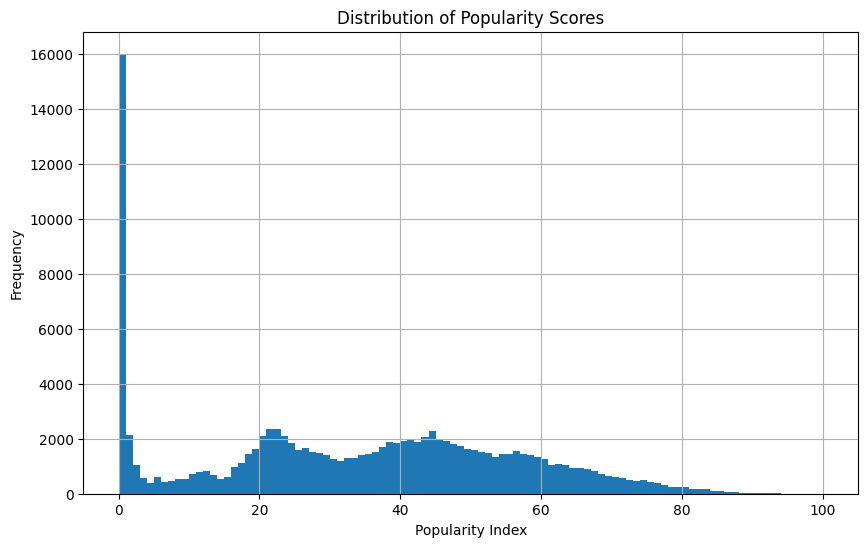

In [20]:
data["popularity"].hist(bins=100, figsize = (10,6))
plt.title("Distribution of Popularity Scores")
plt.xlabel("Popularity Index")
plt.ylabel("Frequency")
plt.show()

### Artists 

`artists` contains strings represesenting lists of artists who perform a track. If there's more than one, then they are seperated by a `;`.

These should be split into different artists

In [26]:
data["artists"].value_counts()

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64

Since we want to predict the success of a track based on *the sound alone*, the influence of artists on popularity will be ignored. 

## Duration 

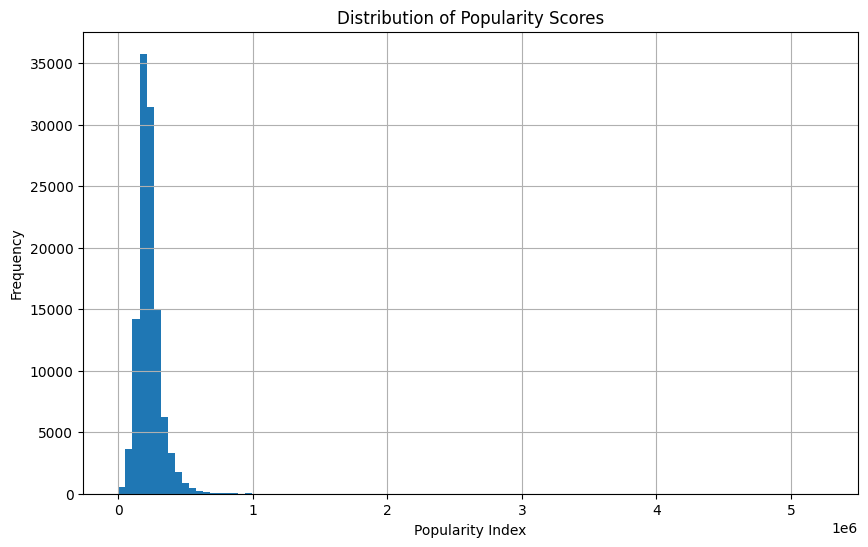

In [27]:
data["duration_ms"].hist(bins=100, figsize = (10,6))
plt.title("Distribution of Popularity Scores")
plt.xlabel("Popularity Index")
plt.ylabel("Frequency")
plt.show()